In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
caminho_2019 = "obitos-2019.csv"
caminho_2020 = "obitos-2020.csv"
caminho_2021 = "obitos-2021.csv"

In [3]:
dados_2019 = pd.read_csv(caminho_2019)
dados_2020 = pd.read_csv(caminho_2020)
dados_2021 = pd.read_csv(caminho_2021)

In [4]:
print(f"Dados 2019: {dados_2019.shape}")
print(f"Dados 2020: {dados_2020.shape}")
print(f"Dados 2021: {dados_2021.shape}")

Dados 2019: (12450, 6)
Dados 2020: (15028, 6)
Dados 2021: (9761, 6)


In [5]:
dados_2019.head(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,7
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,30
3,AC,OUTRAS,HOSPITAL,< 9,M,55
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [6]:
dados_2019["uf"].unique()

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [7]:
dados_2020["uf"].unique()

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [8]:
dados_2021["uf"].unique()

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [17]:
dados_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12450 entries, 0 to 12449
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uf            12450 non-null  object
 1   tipo_doenca   12450 non-null  object
 2   local_obito   12450 non-null  object
 3   faixa_etaria  12450 non-null  object
 4   sexo          12446 non-null  object
 5   total         12450 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 583.7+ KB


In [11]:
total_obitos_2019 = dados_2019.groupby("tipo_doenca").sum()
total_obitos_2019

,total
tipo_doenca,
INDETERMINADA,7028
INSUFICIENCIA_RESPIRATORIA,101112
OUTRAS,663765
PNEUMONIA,226998
SEPTICEMIA,176129
SRAG,1504


In [12]:
total_obitos_2020 = dados_2020.groupby("tipo_doenca").sum()
total_obitos_2020


,total
tipo_doenca,
COVID,197289
INDETERMINADA,9799
INSUFICIENCIA_RESPIRATORIA,99796
OUTRAS,696927
PNEUMONIA,183287
SEPTICEMIA,163968
SRAG,16682


In [13]:
total_obitos_2021 = dados_2021.groupby("tipo_doenca").sum()
total_obitos_2021

,total
tipo_doenca,
COVID,86003
INDETERMINADA,2064
INSUFICIENCIA_RESPIRATORIA,17933
OUTRAS,133367
PNEUMONIA,32878
SEPTICEMIA,32273
SRAG,3118


In [58]:
def grafico_comparativo(causa):

    if causa == "COVID":
        total_2019 = 0
        total_2020 = dados_2020.groupby("tipo_doenca").sum()
        total_2021 = dados_2021.groupby("tipo_doenca").sum()
        lista = [total_2019, int(total_2020.loc["COVID"]), int(total_2021.loc["COVID"])]
    else:
        total_2019 = dados_2019.groupby("tipo_doenca").sum()
        total_2020 = dados_2020.groupby("tipo_doenca").sum()
        total_2021 = dados_2021.groupby("tipo_doenca").sum()
        lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa]), int(total_2021.loc[causa])]
    
    dados = pd.DataFrame({"Total": lista, "Ano": [2019, 2020, 2021]})

    plt.figure(figsize=(10,6))
    plt.title(f"Total de óbitos - {causa}", fontsize=18, fontweight="bold")
    sns.barplot(x="Ano", y="Total", data=dados)
    plt.xlabel("Ano", fontsize=16)
    plt.ylabel("Óbitos", fontsize=16)

    

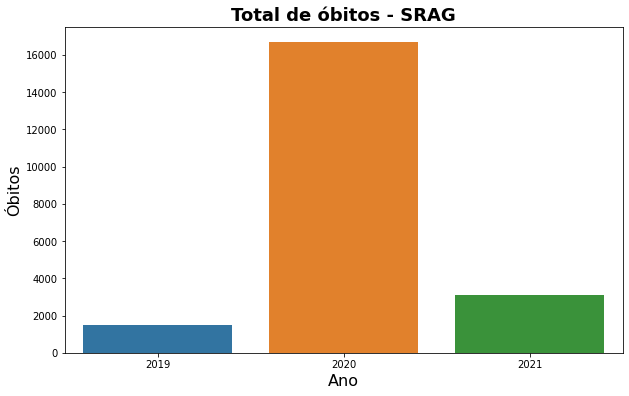

In [60]:
grafico_comparativo("SRAG")